# Case de Processo Seletivo: IBOPE Inteligência

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
xls = '../Dados/Case - Data Science IBOPE.XLS'

In [7]:
dados = pd.read_excel(xls, sheet_name='Informações_Municipais', header=3)
dados = dados.rename(columns={'Taxa bruta de freqüência à escola, 2000':'Taxa bruta de frequência à escola, 2000'})
dados = dados.rename(columns={'Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000':'Média de anos de estudo das pessoas de 25 anos ou mais, 2000'})
dados.sample(3)

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000",...,"Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000"
3168,431260,Muçum (RS),109.1,43.3,114.467178,76.16,9.40,2.02,8.25,312.83,...,93.36,5.33,2666,3088,398,554,4420,4728,3675,1053
3618,251090,Paulista (PB),563.4,20.0,310.060706,66.93,35.92,2.42,48.48,92.96,...,58.12,2.53,4591,5501,703,815,11004,11266,4442,6824
4504,412430,Santo Antônio do Paraíso (PR),167.6,16.6,255.866030,67.37,24.72,2.76,23.89,170.31,...,81.35,4.72,1175,1453,139,179,2488,2790,1718,1072


### Adicionando novos dados ao Dataset

In [8]:
dados2 = dados.copy()
dados2['TAXA DE CRESCIMENTO: MAIS DE 25 ANOS'] = dados['População de 25 anos ou mais de idade, 2000'] - dados['População de 25 anos ou mais de idade, 1991']
dados2['TAXA DE CRESCIMENTO: MAIS DE 65 ANOS'] = dados['População de 65 anos ou mais de idade, 2000'] - dados['População de 65 anos ou mais de idade, 1991']
dados2['TAXA DE CRESCIMENTO POPULACIONAL EM 10 ANOS'] = dados['População total, 2000'] - dados['População total, 1991']
dados2['PROPORÇÃO URBANA DA POPULAÇÃO'] = dados['População urbana, 2000'] / dados['População total, 2000']
dados2['PROPORÇÃO RURAL DA POPULAÇÃO'] = dados['População rural, 2000'] / dados['População total, 2000']
dados = dados2

dados.shape # Tamanho do dataset

(5507, 30)

### Verificação de dados nulos no Dataset

In [9]:
# Tratar os dados/fazer as taxas
dados.info() # todos os dados estão preenchidos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 30 columns):
Código                                                          5507 non-null int64
Município                                                       5507 non-null object
Área (km²)                                                      5507 non-null float64
Densidade demográfica, 2000                                     5507 non-null float64
Distância à capital (km)                                        5507 non-null float64
Esperança de vida ao nascer, 2000                               5507 non-null float64
Mortalidade até um ano de idade, 2000                           5507 non-null float64
Taxa de fecundidade total, 2000                                 5507 non-null float64
Percentual de pessoas de 25 anos ou mais analfabetas, 2000      5507 non-null float64
Renda per Capita, 2000                                          5507 non-null float64
Índice de Gini, 2000                

In [10]:
# Os dados estão 100%

### Criação de dicionários

Estes dicionários tem como objetivo facilitar a visualização dos dados, transformando as diversas colunas em valores numéricos

In [11]:
dicionario, dicionario_inverso = {}, {}
for item in dados.columns: 
  dicionario[item] = list(dados.columns).index(item)
  dicionario_inverso[list(dados.columns).index(item)] = item
#dicionario_inverso

In [12]:
def func_prepara_para_padronizar(dados): #organiza os dados para clusterização
  return dados.drop(["Código", "Município"], axis = 1).rename(columns=dicionario)

In [13]:
dados_numericos = func_prepara_para_padronizar(dados); dados_numericos.head()

,2,3,4,5,6,7,8,9,10,11,...,20,21,22,23,24,25,26,27,28,29
0,136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,...,227,4227,4971,3096,1875,561,106,744,0.622812,0.377188
1,897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,...,459,6492,6446,3927,2519,473,105,-46,0.609215,0.390785
2,1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,...,686,9402,11452,7206,4246,1677,240,2050,0.629235,0.370765
3,1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,...,4688,99989,119152,70843,48309,11343,896,19163,0.594560,0.405440
4,1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,...,1595,20689,22360,19022,3338,2243,511,1671,0.850716,0.149284


###Padronização dos dados

In [14]:
from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_numericos)
# dados_padronizados

### K-Means: Busca pelo melhor número de clusters (Método do cotovelo)

O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k.
Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.
É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [16]:
X = np.array(dados_padronizados)#; X

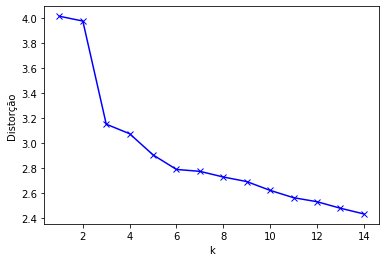

In [17]:
K = range(1,15)

distorcoes = []

for k in K:
  kmeans_modelo = KMeans(n_clusters = k).fit(X)
  kmeans_modelo.fit(X)
  distorcoes.append(sum(np.min(cdist(X, kmeans_modelo.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distorcoes, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.show()

### Dendrograma

A decisão do número de clusters que melhor representem diferentes grupos podem ser escolhidos observando-se o dendrograma. A melhor escolha do número de clusters é o número de linhas verticais no dendrograma cortadas por uma linha horizontal que pode atravessar verticalmente a distância máxima sem intersectar um cluster.

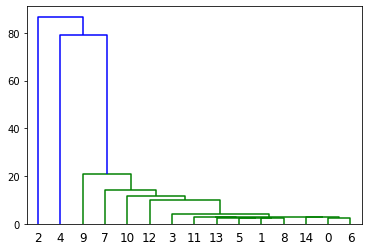

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograma

modelo = KMeans(n_clusters=15)
modelo.fit(X)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=dados_numericos.columns)

matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)
dendrograma;

### Criação do modelo K-Means

A ideia aqui é fazer uma segunda versão abrangindo mais de 3 categorias, para deixar maior a variação e percepção dos dados, diferente de uma tentativa prévia, e visualizar de uma forma um pouco mais exponêncial um potencial crescimento.

In [19]:
n = 7 # número de clusters
#n=3

modelo = KMeans(n_clusters=n, random_state=0)
modelo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [20]:
# quantidade em cada grupo
pd.Series(modelo.labels_).value_counts()

3    1427
1    1423
4    1392
5    1220
0      43
6       1
2       1
dtype: int64

### Visualização dos grupos

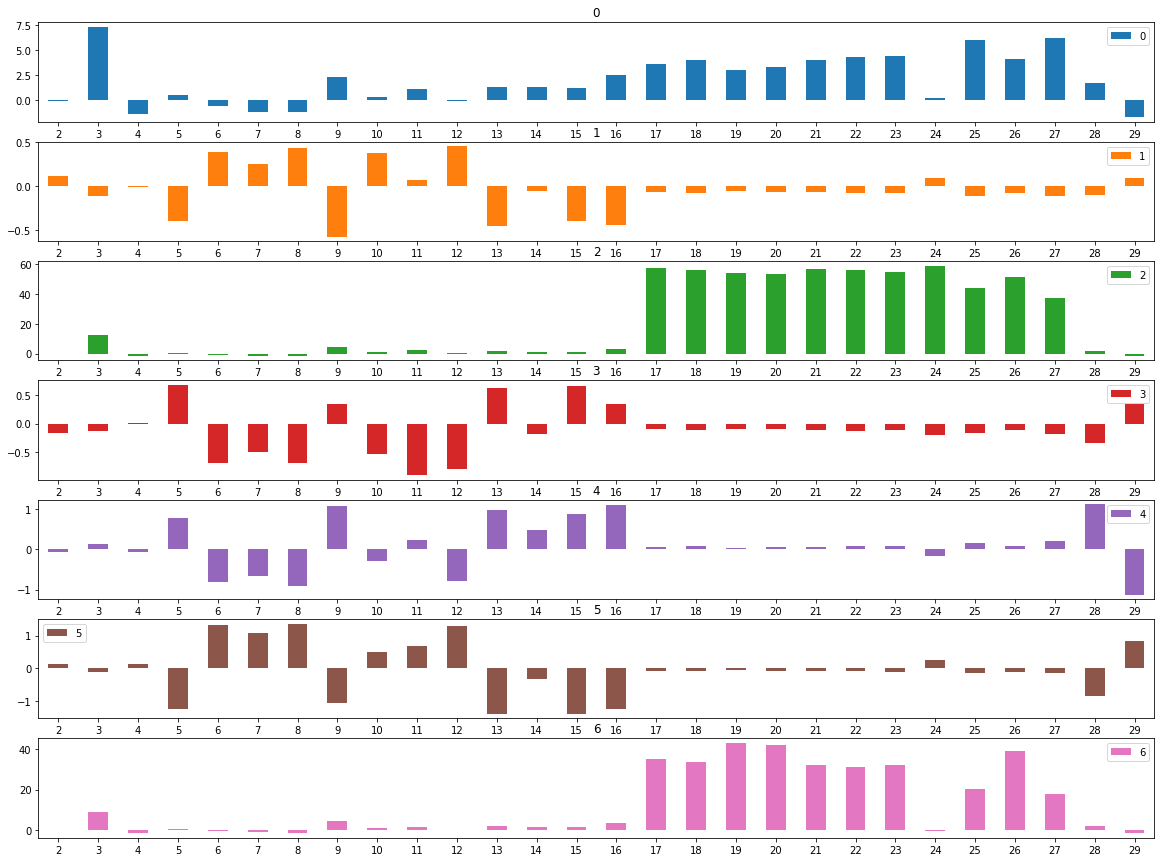

In [21]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=dados_numericos.columns)
grupos.transpose().plot.bar(
    subplots = True, figsize=(20, 15), sharex = False, rot=0);

In [22]:
#grupos

### Adição do grupo a tabela

In [23]:
dados_agrupados = dados.copy()
dados_agrupados['GRUPOS'] = modelo.labels_#; dados_agrupados.sample(3)

### Análise por grupo: média

In [24]:
número_de_municipios = pd.Series(modelo.labels_).value_counts().sort_index()

In [25]:
medias_grupos = dados_agrupados.drop("Código", axis=1).set_index("GRUPOS").groupby("GRUPOS").aggregate(np.mean).round(2)
medias_grupos["Quantidade de cidades no grupo"] = número_de_municipios; medias_grupos

,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000",...,"População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",TAXA DE CRESCIMENTO: MAIS DE 25 ANOS,TAXA DE CRESCIMENTO: MAIS DE 65 ANOS,TAXA DE CRESCIMENTO POPULACIONAL EM 10 ANOS,PROPORÇÃO URBANA DA POPULAÇÃO,PROPORÇÃO RURAL DA POPULAÇÃO,Quantidade de cidades no grupo
GRUPOS,,,,,,,,,,,,,,,,,,,,,
0,1024.48,3928.98,32.80,70.43,23.09,1.99,8.04,395.83,0.58,60.98,...,697441.26,830588.40,822549.53,8038.86,101414.67,14331.00,133147.14,0.99,0.01,43
1,2204.67,36.74,252.26,65.82,41.25,3.06,33.26,115.74,0.58,50.52,...,16001.88,17790.52,11048.21,6742.31,1584.40,249.98,1788.64,0.57,0.43,1423
2,1528.50,6808.10,0.00,70.66,21.74,1.88,5.62,610.04,0.62,74.59,...,9649519.00,10434252.00,9813187.00,621065.00,719728.00,170900.00,784733.00,0.94,0.06,1
3,581.34,25.05,255.11,71.04,21.31,2.49,16.31,203.42,0.53,40.21,...,7525.58,7832.36,4212.95,3619.41,607.01,142.26,306.78,0.51,0.49,1427
4,1155.75,163.25,241.44,71.49,19.01,2.37,13.04,274.56,0.54,52.32,...,37450.72,45850.89,41735.23,4115.66,6067.73,841.82,8400.17,0.85,0.15,1392
5,2384.47,30.36,273.72,61.78,58.28,3.67,47.34,69.90,0.59,56.82,...,13167.60,14323.44,5806.82,8516.61,994.50,164.11,1155.84,0.39,0.61,1220
6,1264.20,4627.90,0.00,70.26,21.83,1.87,4.86,596.65,0.62,65.02,...,5480768.00,5857904.00,5857904.00,0.00,335764.00,131037.00,377136.00,1.00,0.00,1


In [26]:
#medias_grupos.sort_values("População total, 2000", ascending=False)

Nesta análise é possivel notar uma relação bem clara entre os 4 primeiros grupos, onde há uma relação direta com o crescimento de renda, população e desenvolvimento humano no geral. Há uma relação direta entre os melhores lugares a ser investidos: onde há mais clientes e onde a renda é superior. Vou utilizar um dicionário para guardar esta sequência.

In [27]:
########## verificar
dicionario_nivel_cidade = {3:'A', 2:'B', 5:'C', 0:'D', 1:'E', 6:'F', 4:'G'}
###########

In [28]:
medias_grupos.sort_values("População total, 2000", ascending=False).rename(index=dicionario_nivel_cidade)

,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000",...,"População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",TAXA DE CRESCIMENTO: MAIS DE 25 ANOS,TAXA DE CRESCIMENTO: MAIS DE 65 ANOS,TAXA DE CRESCIMENTO POPULACIONAL EM 10 ANOS,PROPORÇÃO URBANA DA POPULAÇÃO,PROPORÇÃO RURAL DA POPULAÇÃO,Quantidade de cidades no grupo
GRUPOS,,,,,,,,,,,,,,,,,,,,,
B,1528.50,6808.10,0.00,70.66,21.74,1.88,5.62,610.04,0.62,74.59,...,9649519.00,10434252.00,9813187.00,621065.00,719728.00,170900.00,784733.00,0.94,0.06,1
F,1264.20,4627.90,0.00,70.26,21.83,1.87,4.86,596.65,0.62,65.02,...,5480768.00,5857904.00,5857904.00,0.00,335764.00,131037.00,377136.00,1.00,0.00,1
D,1024.48,3928.98,32.80,70.43,23.09,1.99,8.04,395.83,0.58,60.98,...,697441.26,830588.40,822549.53,8038.86,101414.67,14331.00,133147.14,0.99,0.01,43
G,1155.75,163.25,241.44,71.49,19.01,2.37,13.04,274.56,0.54,52.32,...,37450.72,45850.89,41735.23,4115.66,6067.73,841.82,8400.17,0.85,0.15,1392
E,2204.67,36.74,252.26,65.82,41.25,3.06,33.26,115.74,0.58,50.52,...,16001.88,17790.52,11048.21,6742.31,1584.40,249.98,1788.64,0.57,0.43,1423
C,2384.47,30.36,273.72,61.78,58.28,3.67,47.34,69.90,0.59,56.82,...,13167.60,14323.44,5806.82,8516.61,994.50,164.11,1155.84,0.39,0.61,1220
A,581.34,25.05,255.11,71.04,21.31,2.49,16.31,203.42,0.53,40.21,...,7525.58,7832.36,4212.95,3619.41,607.01,142.26,306.78,0.51,0.49,1427


### Principais parâmetros por grupos:

In [29]:
grupos_renomeados = grupos.copy()
grupos_renomeados = grupos_renomeados.rename(columns=dicionario_inverso)#; grupos_renomeados

In [30]:
# Verifica características relevantes de um determinado grupo
grupo_para_verificar = 2
grupos_renomeados.loc[grupo_para_verificar].sort_values(ascending = False)

População rural, 2000                                           58.946722
População de 25 anos ou mais de idade, 1991                     57.088063
População total, 1991                                           56.945005
População de 25 anos ou mais de idade, 2000                     55.926341
População total, 2000                                           55.712617
População urbana, 2000                                          54.379758
População de 65 anos ou mais de idade, 1991                     53.671099
População de 65 anos ou mais de idade, 2000                     53.164569
TAXA DE CRESCIMENTO: MAIS DE 65 ANOS                            51.129606
TAXA DE CRESCIMENTO: MAIS DE 25 ANOS                            44.093978
TAXA DE CRESCIMENTO POPULACIONAL EM 10 ANOS                     37.338188
Densidade demográfica, 2000                                     12.808966
Renda per Capita, 2000                                           4.555501
Média de anos de estudo das pessoas de

In [33]:
dados_agrupados[dados_agrupados['GRUPOS'] == grupo_para_verificar] # verifica a tabela por grupo

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000",...,"População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",TAXA DE CRESCIMENTO: MAIS DE 25 ANOS,TAXA DE CRESCIMENTO: MAIS DE 65 ANOS,TAXA DE CRESCIMENTO POPULACIONAL EM 10 ANOS,PROPORÇÃO URBANA DA POPULAÇÃO,PROPORÇÃO RURAL DA POPULAÇÃO,GRUPOS
4818,355030,São Paulo (SP),1528.5,6808.1,0.0,70.66,21.74,1.88,5.62,610.04,...,9649519,10434252,9813187,621065,719728,170900,784733,0.940478,0.059522,2


### Modelo Preditivo

In [34]:
# Previsão pelo modelo
amostra = dados.sample()
amostra_drop = func_prepara_para_padronizar(amostra)
amostra_padronizada = scaler.transform(amostra_drop)#; amostra_padronizada

In [35]:
#print(modelo.predict(amostra_padronizada))
#print(dados_agrupados['GRUPOS'].iloc[amostra_drop.index].values)

In [36]:
def probabilidade_de_proximidade(amostra_padronizada):
  distancias = modelo.transform(amostra_padronizada)
  distancias2 = 1/distancias
  soma = distancias2.sum()
  proporcoes = distancias2 / soma

  grupo = 0
  for item in proporcoes[0]:
    print(f'grupo {dicionario_nivel_cidade[grupo]} ou {grupo}: {round(item*100,2)}%')
    grupo += 1

In [37]:
x = probabilidade_de_proximidade(amostra_padronizada); x

grupo D ou 0: 5.02%
grupo E ou 1: 28.18%
grupo B ou 2: 0.48%
grupo A ou 3: 24.97%
grupo G ou 4: 24.81%
grupo C ou 5: 15.74%
grupo F ou 6: 0.79%
